#Attribute Information

##Age: age of the patient [years]
##Sex: sex of the patient [M: Male, F: Female]
##ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
##RestingBP: resting blood pressure [mm Hg]
##Cholesterol: serum cholesterol [mm/dl]
##FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
##RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
##MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
##ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
##Oldpeak: oldpeak = ST [Numeric value measured in depression]
##ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
##HeartDisease: output class [1: heart disease, 0: Normal]
Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations



In [64]:
#importing the math necessary libararies
import pandas as pd
import numpy as np

In [65]:
#importing visuvalization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
df = pd.read_excel("/content/drive/MyDrive/HeartAnalysis/oneheart.xls")

In [67]:
#printing the top 5 row of the datset of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [68]:
#printing the last 5 row of the datset of the dataset

df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [69]:
#dataset column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [70]:
#total number of observation
len(df)

918

In [71]:
#printing the schema of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [72]:
#no null values present in the dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [73]:
#no duplicated values present in the dataset
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [74]:
df.corr()

<ipython-input-74-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<ipython-input-75-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

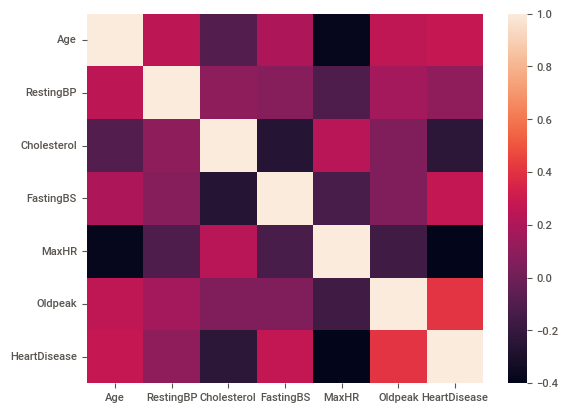

In [75]:
sns.heatmap(df.corr())

In [76]:
#number of males and females present in the dataset
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

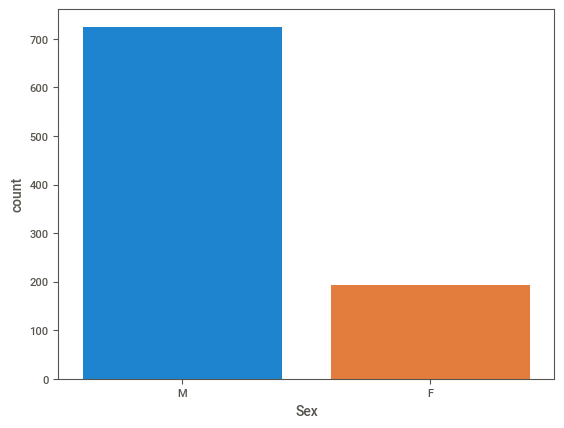

In [77]:
sns.countplot(x = 'Sex',
            data = df)

Text(0, 0.5, 'count of values')

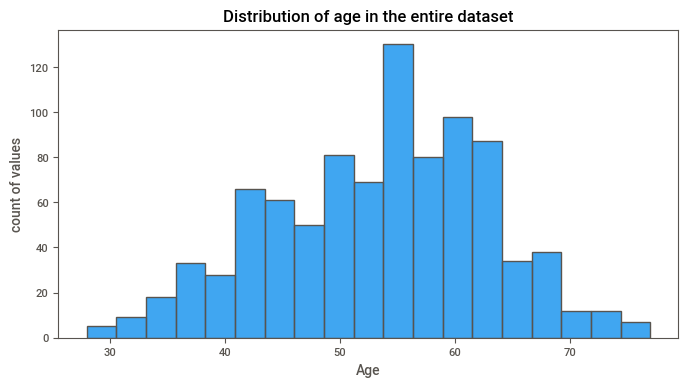

In [78]:
#exploring Age coloumn of the dataset
plt.figure(figsize = (8,4))
sns.histplot(data = df, x = df["Age"])
plt.title("Distribution of age in the entire dataset")
plt.ylabel("count of values")

<Axes: xlabel='Age'>

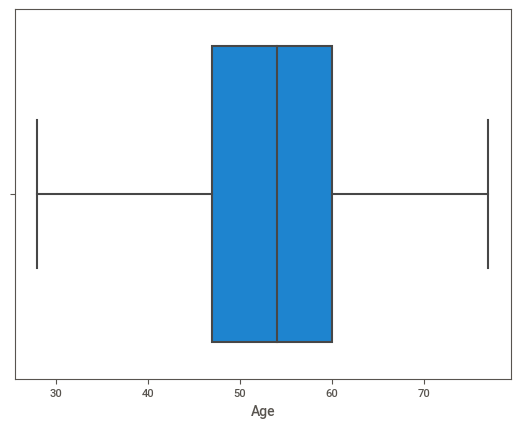

In [79]:
sns.boxplot(data = df, x = df["Age"])

<Axes: xlabel='Age', ylabel='Count'>

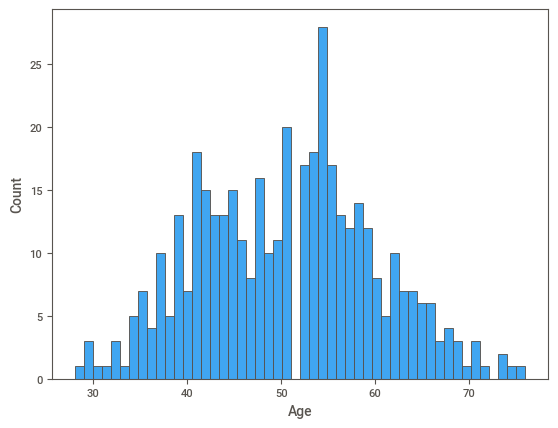

In [80]:
sns.histplot(df[df['HeartDisease']==0]['Age'],kde=False,bins=50)

<Axes: xlabel='Age', ylabel='Count'>

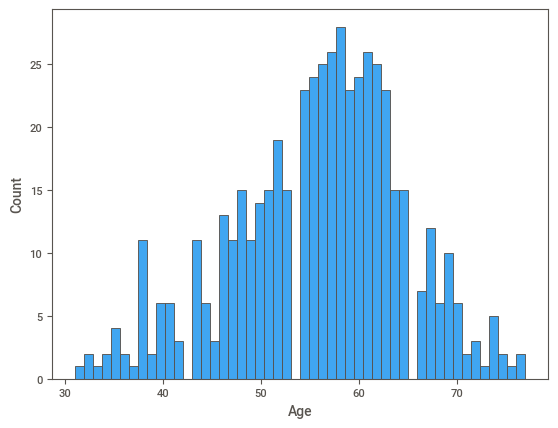

In [81]:
sns.histplot(df[df['HeartDisease']==1]['Age'],kde=False,bins=50)

<Axes: xlabel='Sex', ylabel='count'>

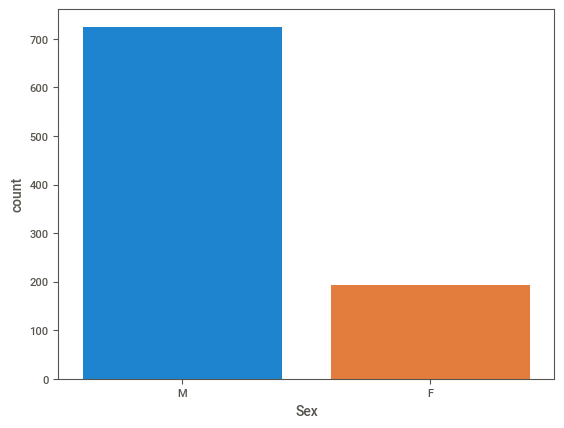

In [82]:
sns.countplot(data = df, x= df["Sex"])

In [83]:
categorical_columns = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

In [84]:
df.groupby(['HeartDisease', 'Sex']).size()

HeartDisease  Sex
0             F      143
              M      267
1             F       50
              M      458
dtype: int64

<Axes: xlabel='Sex,HeartDisease'>

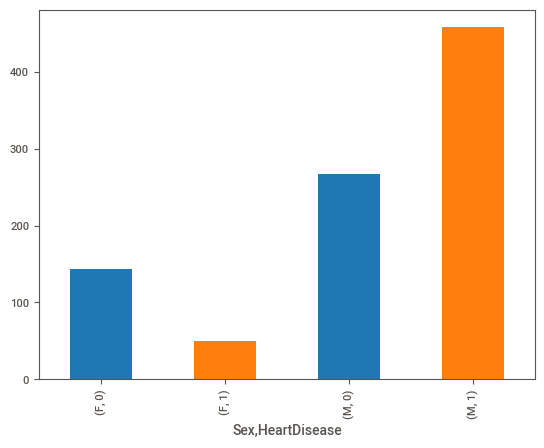

In [85]:
#comparision of genders with heart diease and not having heart disease
df.groupby(['Sex', 'HeartDisease']).size().plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
#the below indicates that males have high probability getting a heart disease

Text(0, 0.5, 'count of values')

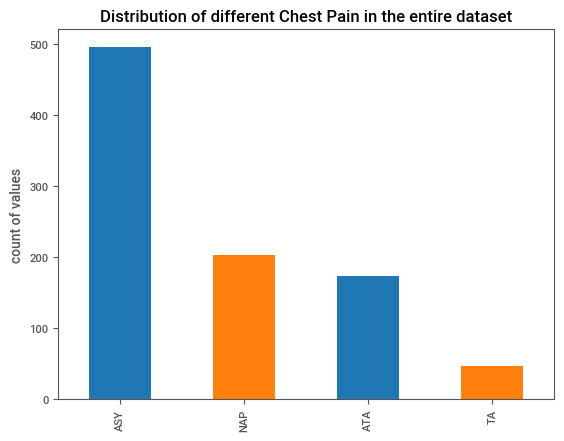

In [129]:
df["ChestPainType"].value_counts().plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title("Distribution of different Chest Pain in the entire dataset")
plt.ylabel("count of values")

In [86]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

<Axes: xlabel='ChestPainType,HeartDisease'>

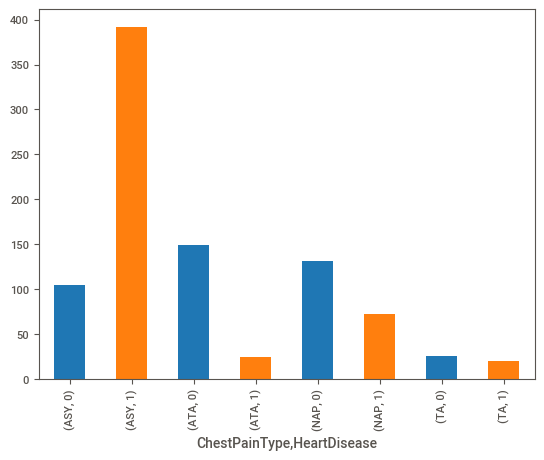

In [87]:
df.groupby(['ChestPainType', 'HeartDisease']).size().plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

In [127]:
df.groupby(['ChestPainType', 'HeartDisease']).size()

ChestPainType  HeartDisease
ASY            0               104
               1               392
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
dtype: int64

In [89]:
df.groupby(['ChestPainType', 'Sex']).size()

ChestPainType  Sex
ASY            F       70
               M      426
ATA            F       60
               M      113
NAP            F       53
               M      150
TA             F       10
               M       36
dtype: int64

In [91]:
df.groupby(['ChestPainType', 'HeartDisease']).size()

ChestPainType  HeartDisease
ASY            0               104
               1               392
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
dtype: int64

In [93]:
df.groupby(['ChestPainType', 'HeartDisease', 'Sex']).size()

ChestPainType  HeartDisease  Sex
ASY            0             F       31
                             M       73
               1             F       39
                             M      353
ATA            0             F       56
                             M       93
               1             F        4
                             M       20
NAP            0             F       47
                             M       84
               1             F        6
                             M       66
TA             0             F        9
                             M       17
               1             F        1
                             M       19
dtype: int64

<Axes: xlabel='ChestPainType,HeartDisease,Sex'>

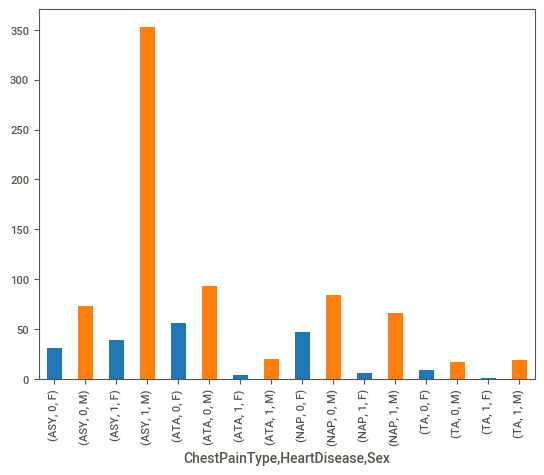

In [94]:
df.groupby(['ChestPainType', 'HeartDisease', 'Sex']).size(
    ).plot(kind = "bar", stacked=True,
           color=['#1f77b4', '#ff7f0e'])

##realtion between heart diease and excercise angina(chest pain during excercise)

In [95]:
df.groupby(['ExerciseAngina', 'HeartDisease']).size()

ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               0                55
                1               316
dtype: int64

<Axes: xlabel='ExerciseAngina,HeartDisease'>

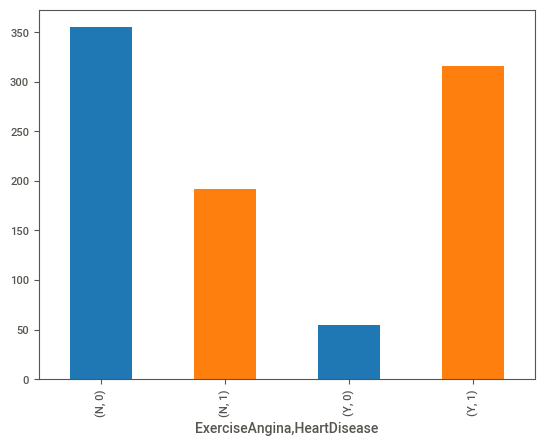

In [96]:
df.groupby(['ExerciseAngina', 'HeartDisease']).size().plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

<Axes: xlabel='ExerciseAngina,HeartDisease,Sex'>

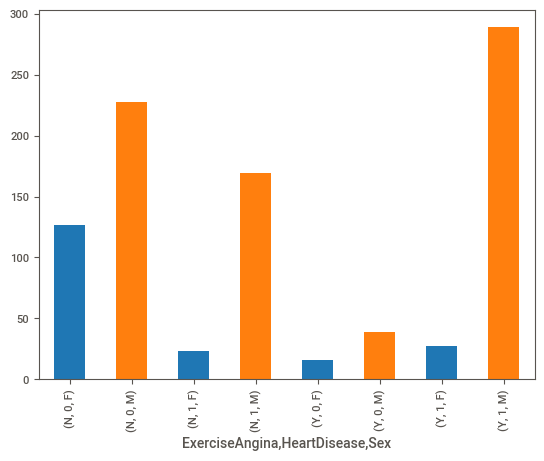

In [130]:
df.groupby(['ExerciseAngina', 'HeartDisease', 'Sex']).size(
    ).plot(kind = "bar", stacked=True,
           color=['#1f77b4', '#ff7f0e'])

In [97]:
df['HeartDisease'].corr(df['Oldpeak'])

0.40395072206288657

In [98]:
df['Oldpeak'].max()

6.2

In [99]:
df['Oldpeak'].min()

-2.6

In [134]:
df.groupby(['ST_Slope', 'HeartDisease', 'Sex']).size()

ST_Slope  HeartDisease  Sex
Down      0             F        2
                        M       12
          1             F        5
                        M       44
Flat      0             F       36
                        M       43
          1             F       39
                        M      342
Up        0             F      105
                        M      212
          1             F        6
                        M       72
dtype: int64

<Axes: xlabel='ST_Slope,HeartDisease,Sex'>

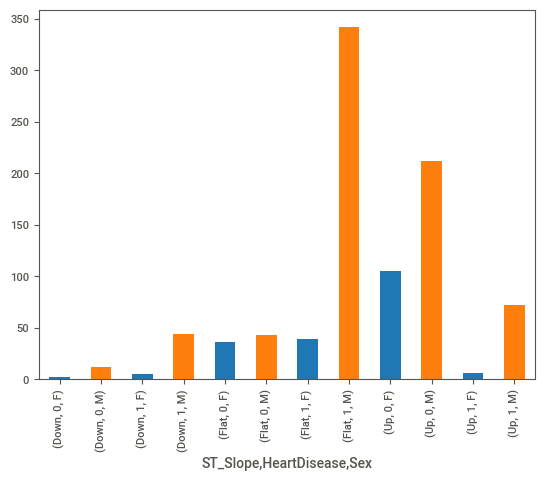

In [133]:
df.groupby(['ST_Slope', 'HeartDisease', 'Sex']).size(
    ).plot(kind = "bar", stacked=True,
           color=['#1f77b4', '#ff7f0e'])

In [100]:
df[df["Cholesterol"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [101]:
zero_Cholesterol = df[df["Cholesterol"]==0]

In [102]:
len(zero_Cholesterol)

172

In [103]:
zero_Cholesterol["HeartDisease"].value_counts()

1    152
0     20
Name: HeartDisease, dtype: int64

In [104]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='Count'>

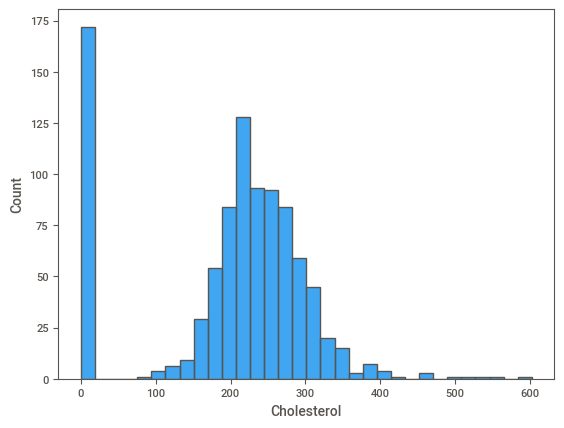

In [105]:
sns.histplot(data = df, x = df["Cholesterol"])

BIVariate Analysis


In [106]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='Age', ylabel='Cholesterol'>

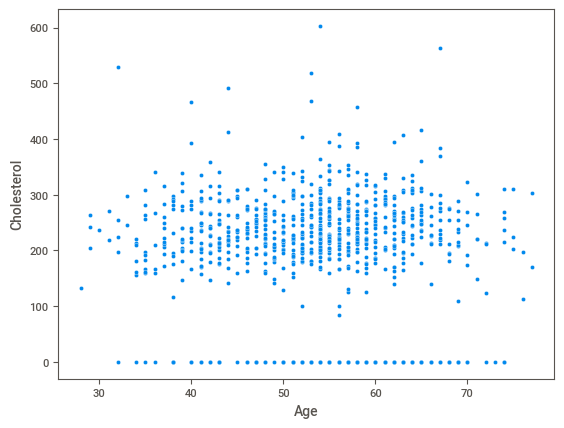

In [107]:
sns.scatterplot(data = df, x = df["Age"], y = df["Cholesterol"])

<Axes: xlabel='Sex', ylabel='count'>

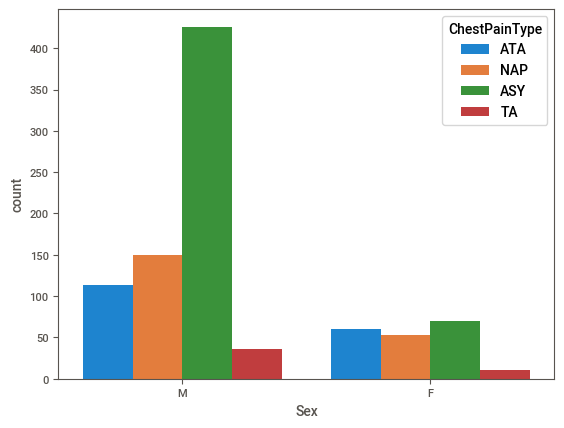

In [108]:
sns.countplot(data= df, x='Sex',hue='ChestPainType')

<Axes: xlabel='ST_Slope', ylabel='count'>

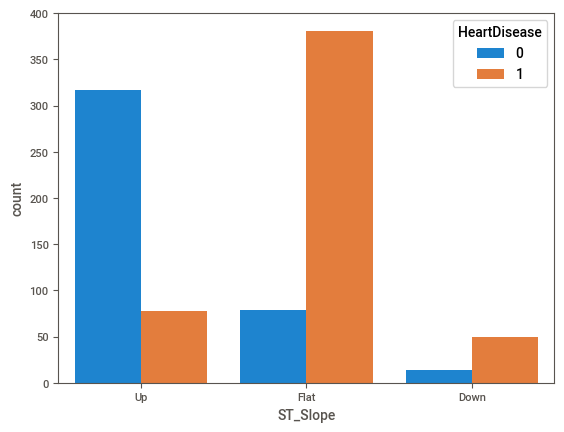

In [110]:
sns.countplot(data= df, x='ST_Slope',hue='HeartDisease')

In [111]:
pd.crosstab(index = df["HeartDisease"], columns = df["ST_Slope"])

ST_Slope,Down,Flat,Up
HeartDisease,,,
0,14,79,317
1,49,381,78


In [112]:
pd.pivot_table(df, index = "HeartDisease", values = "MaxHR", aggfunc=np.median)

,MaxHR
HeartDisease,
0,150
1,126


In [113]:
pd.pivot_table(df, index = "HeartDisease", values = "RestingBP", aggfunc=np.median)

,RestingBP
HeartDisease,
0,130
1,132


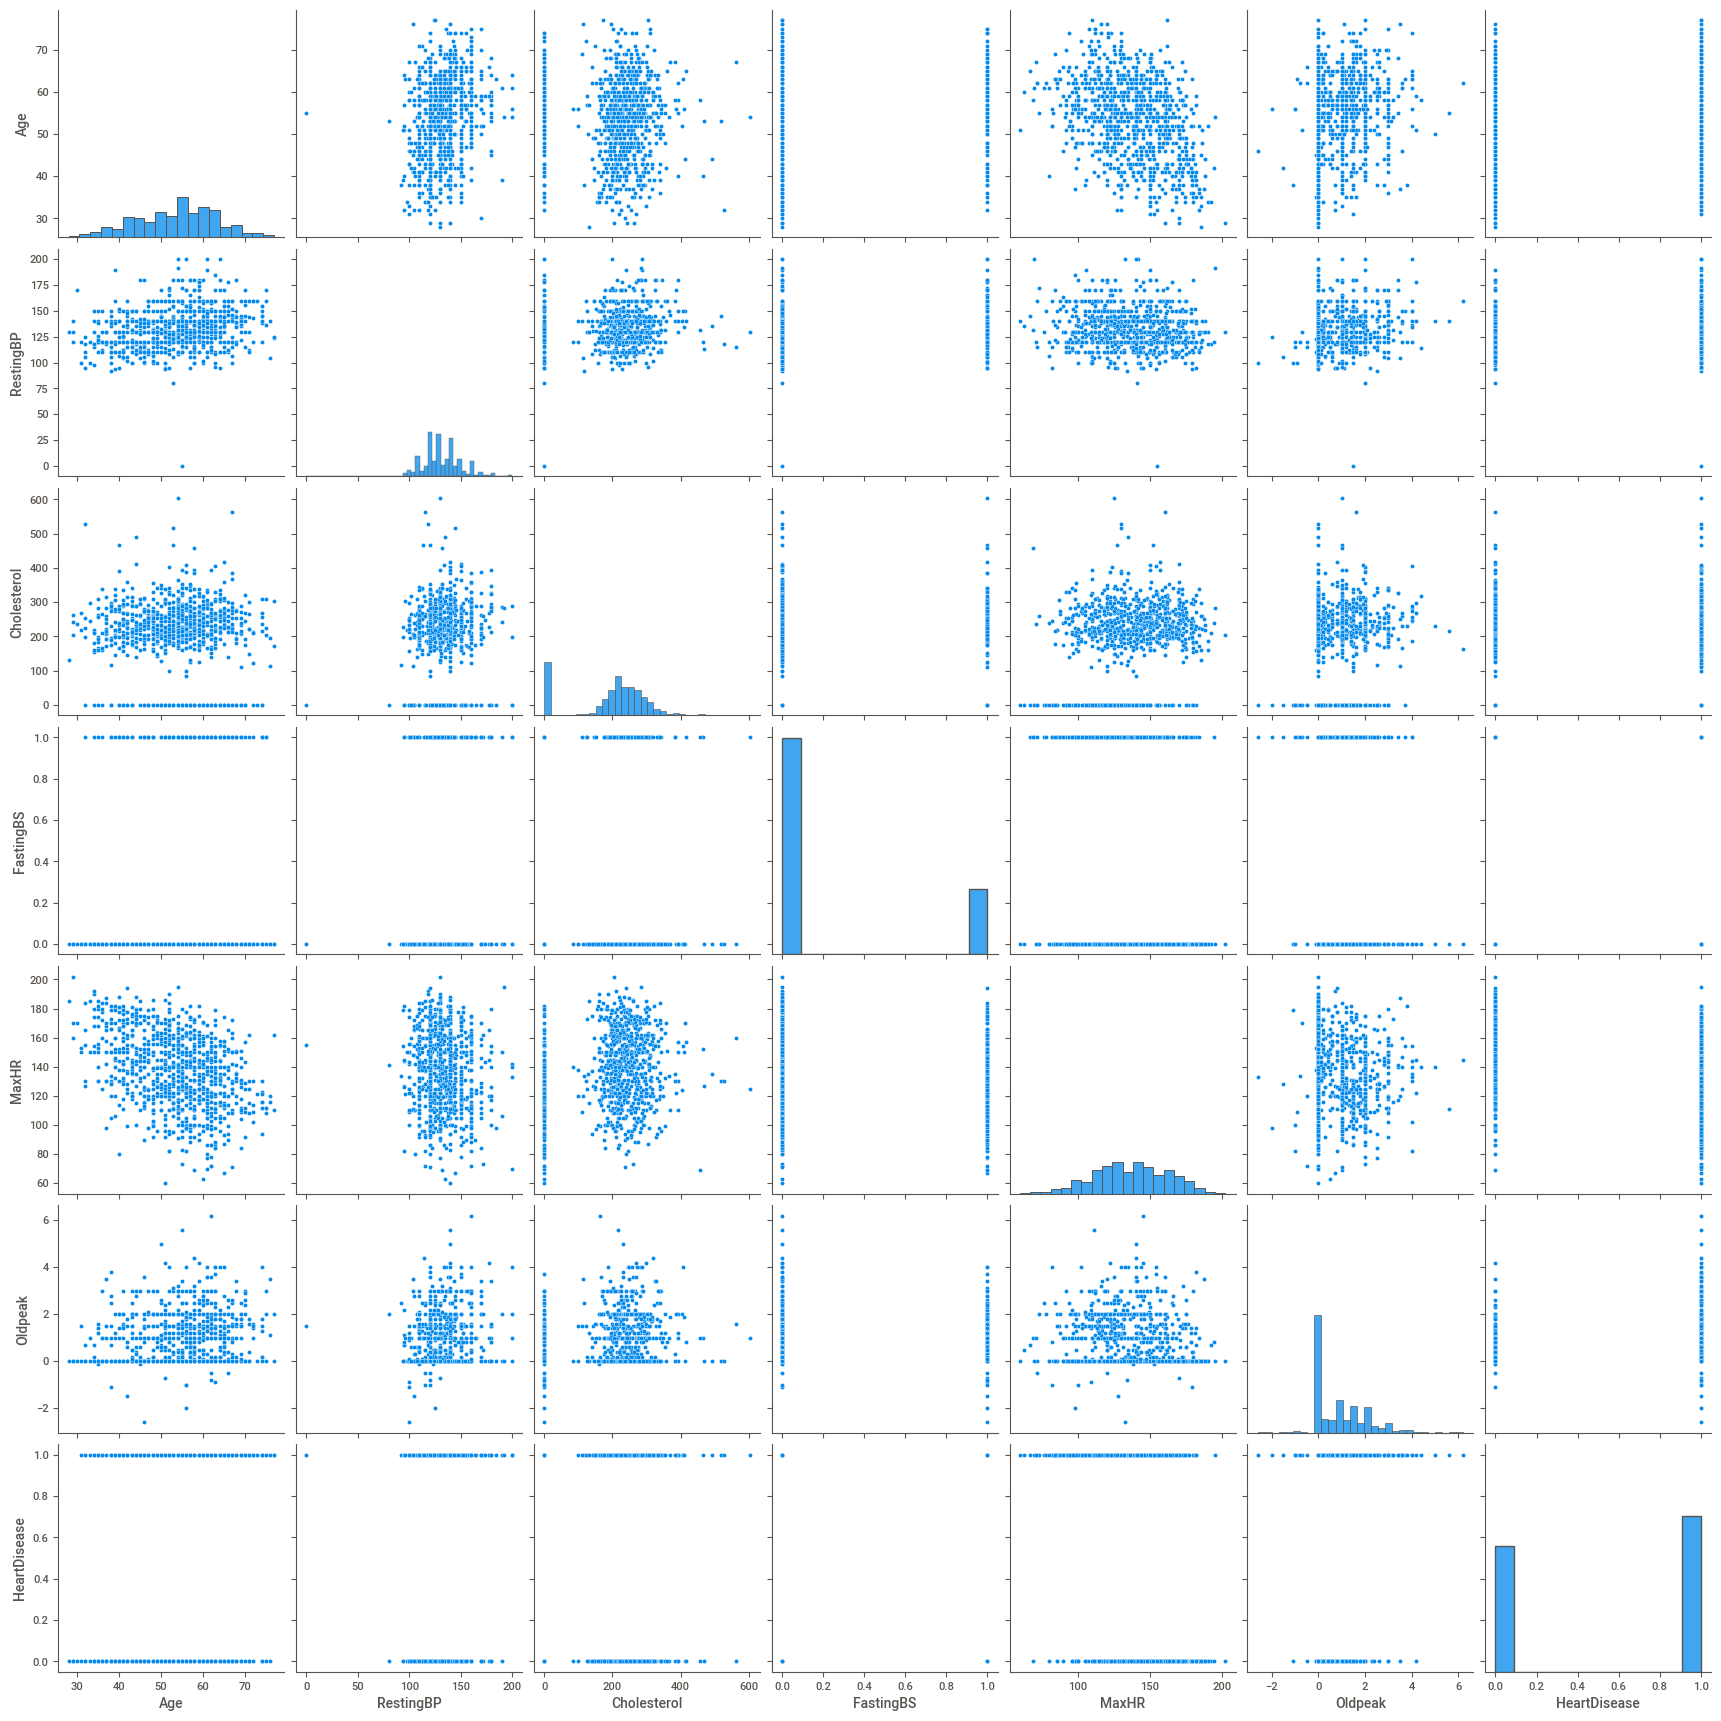

In [114]:
sns.pairplot(df)

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

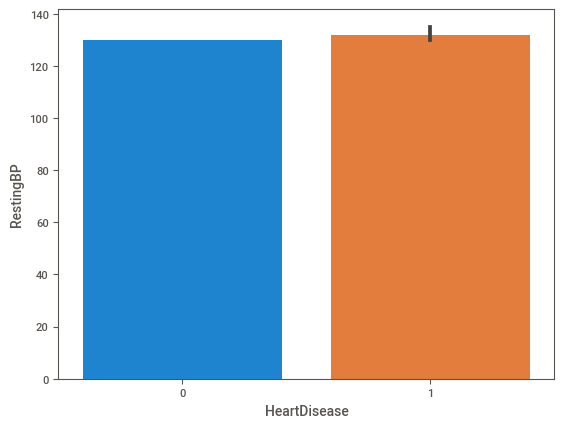

In [115]:
sns.barplot(data = df,x=df['HeartDisease'],y=df['RestingBP'],
            estimator = np.median)

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

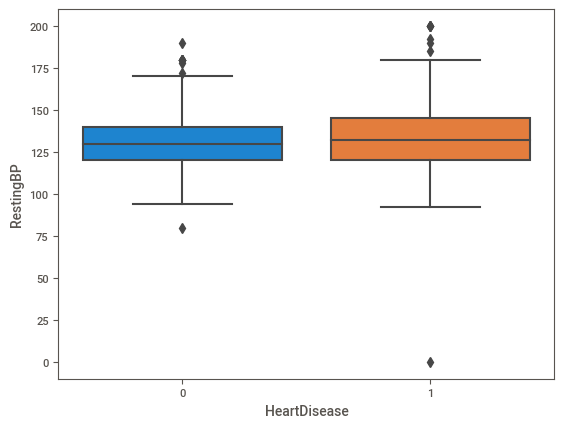

In [116]:
sns.boxplot(data = df,x=df['HeartDisease'],y=df['RestingBP'])

<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

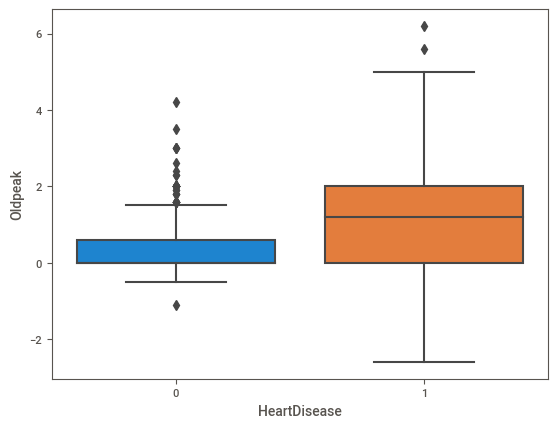

In [117]:
sns.boxplot(data = df,x=df['HeartDisease'],y=df['Oldpeak'])

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

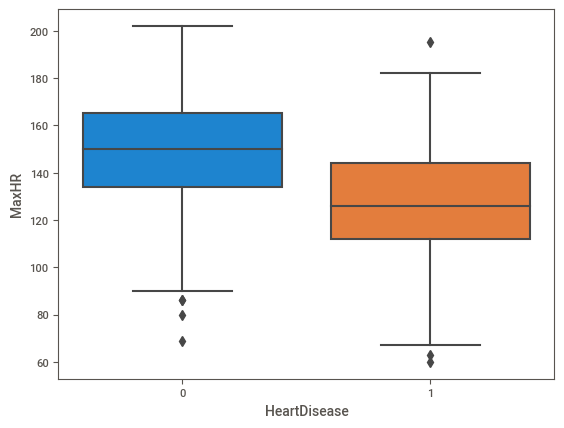

In [118]:
sns.boxplot(data = df,x=df['HeartDisease'],y=df['MaxHR'])

In [ ]:
!pip install pandas_profiling

In [120]:
from pandas_profiling import ProfileReport

In [121]:
profile_min = ProfileReport(df, minimal=True)

In [122]:
profile_min

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [123]:
!pip install sweetviz

In [124]:
import pandas as pd
import sweetviz

In [125]:
viz_report = sweetviz.analyze(df, target_feat ='HeartDisease')


/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.p

In [126]:
viz_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
